<a href="https://colab.research.google.com/github/yebiny/SkillTreePython-DataAnalysis/blob/main/03.%ED%86%B5%EA%B3%84%EA%B8%B0%EB%B0%98%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D/ch03_01_%ED%99%95%EB%A5%A0%EB%B3%80%EC%88%98%EC%99%80_%ED%99%95%EB%A5%A0%ED%95%A8%EC%88%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch03.01. 확률 변수와 확률 함수
---
* 날짜: 2022-05-04
* 이름: 고민수

## 학습내용
    - 실험 (Experiment) : 데이터셋을 생성하는 모든 프로세스 
    - 표본 공간 (Sample space): 실험에서 도출되는 모든 결과를 포함하는 공간
    - 사건 (Event) : 표본 공간 S의 부분집합
    - 확률 변수 (Random variable) : 표본공간의 모든 요소를 실수로 매핑하는 함수
    - 확률 함수 (Probability function) : 확률을 매핑하는 함수

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc("font", family="Noto Sans KR") # 한글 폰트 설정
plt.rc("axes", unicode_minus=False) # 음수값 깨지는 폰트 설정

#### **예제 01. 공정한 주사위**



* 확률변수가 '주사위를 굴려 나온 눈의 값' 일 때, 확률변수 $X$를 정의하세요.

In [1]:
X = [1,2,3,4,5,6]
X

[1, 2, 3, 4, 5, 6]

* 주사위의 모든 면이 '공정' 할 때, 확률 질량 함수 $P$를 정의하세요.

In [2]:
def P(x):
    if 1<= x <=6: return 1/6
    else: 0

In [3]:
P_X = list(map(P,X))
print(P_X)

[0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666]


* 확률 분포를 그리세요.

NameError: name 'X' is not defined

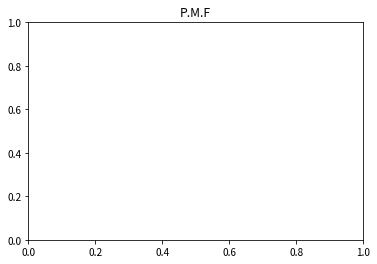

In [6]:
import matplotlib.pyplot as plt

plt.title("P.M.F")
plt.bar(X,P_X)

* 누적 확률 분포를 그리세요.

<BarContainer object of 6 artists>

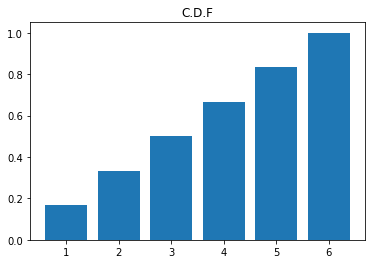

In [13]:
F_X = np.cumsum(P_X)
F_X
plt.title("C.D.F")
plt.bar(X,F_X)

#### **예제 02. 동전 두번 던지기**


* 확률변수가 '앞면이 나온 횟수' 일 때, 확률변수 $X$를 정의하세요.

In [67]:
X={0:1,1:2,2:1}
X

{0: 1, 1: 2, 2: 1}

* 확률 질량 함수를 정의하세요.

In [68]:
def F2_X(X):
    for x in X.keys():
        X[x] /= 4
    return X
P2 = F2_X(X)
P2

{0: 0.25, 1: 0.5, 2: 0.25}

* 확률 분포를 그리세요.

<BarContainer object of 3 artists>

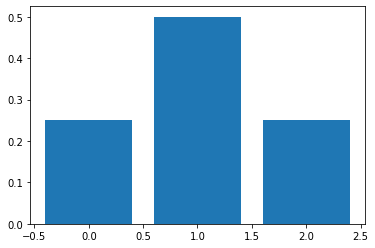

In [78]:
plt.bar(X.keys(), P2.values())

* 누적 확률 분포를 그리세요.

<BarContainer object of 3 artists>

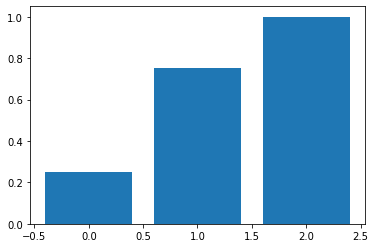

In [79]:
F2_X = np.cumsum(list(P2.values()))
plt.bar(X.keys(), F2_X)

#### **예제 03. 화재 발생**


*  확률변수가 '1년간 발생한 화재건수' 일 때 $X$를 정의하세요.

In [85]:
X = [i for i in range(11)]
X

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [86]:
X_arr = np.arange(11)
X_arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

* 화재발생 확률이 다음과 같이 주어졌을 때 함수 $f$ 를 정의하세요.

\begin{align}
f(X=x)=\frac{1}{2^{(x+1)}}
\end{align}

In [87]:
def f(x):
    return 1/( 2**(x+1) )

* 확률 분포를 그리세요.

In [88]:
p_X = list(map(f, X))
p_X

[0.5,
 0.25,
 0.125,
 0.0625,
 0.03125,
 0.015625,
 0.0078125,
 0.00390625,
 0.001953125,
 0.0009765625,
 0.00048828125]

In [89]:
p_X_arr = list(map(f, X_arr))
p_X_arr

[0.5,
 0.25,
 0.125,
 0.0625,
 0.03125,
 0.015625,
 0.0078125,
 0.00390625,
 0.001953125,
 0.0009765625,
 0.00048828125]

In [90]:
# Numpy 의 브로드캐스팅
# 조건문 통과는 Numpy 브로드캐스팅이 되지않고 연산만 가능하다.
p_X_arr = f(X_arr)
p_X_arr

array([5.0000000e-01, 2.5000000e-01, 1.2500000e-01, 6.2500000e-02,
       3.1250000e-02, 1.5625000e-02, 7.8125000e-03, 3.9062500e-03,
       1.9531250e-03, 9.7656250e-04, 4.8828125e-04])

* 누적 확률 분포를 그리세요.

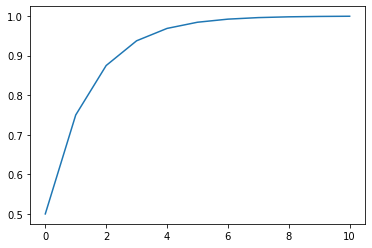

In [93]:
f_X_arr = np.cumsum(p_X_arr)
plt.plot(X,f_X_arr)

#### **예제 04. 공정하지 않은 주사위**


* 확률변수가 '주사위를 굴려 나온 눈의 값' 일 때, 확률변수 $X$를 정의하세요.

In [108]:
X4 = [1,2,3,4,5,6]

* 주사위의 짝수 면이 나올 확률이 홀수 면이 나올 확률의 2배일 때, 확률 질량 함수 $P$를 정의하세요.

In [109]:
def f4(X):
    if X%2==0:
        return 2/9
    else:
        return 1/9
P4 = list(map(f4,X4))
P4

[0.1111111111111111,
 0.2222222222222222,
 0.1111111111111111,
 0.2222222222222222,
 0.1111111111111111,
 0.2222222222222222]

* 확률분포 를 그리세요.

<BarContainer object of 6 artists>

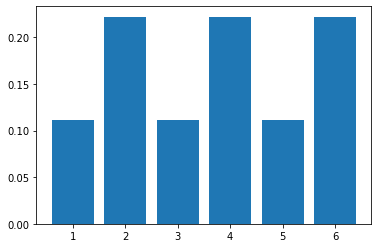

In [110]:
plt.bar(X4, P4)

* 누적 확률 분포를 그리세요.

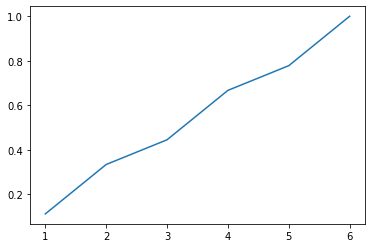

In [111]:
F4 = np.cumsum(P4)
plt.plot(X4, F4)

#### **예제 05. 주사위 두번 굴리기**


* 확률변수가 '주사위를 두번 굴려 나온 눈의 합' 일 때, 확률변수 $X$를 정의하세요.

In [131]:
X5_1 = [1,2,3,4,5,6]
X5_2 = [1,2,3,4,5,6]
X5_a = []
for i in X5_1:
    for j in X5_2:
        X5_a.append(i+j)
X5 =  list(set(X5_a))
X5

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

*  확률 질량 함수 $P$ 를 정의하세요.

In [130]:
def f5(X):
    return X5_a.count(X)/36
P5 = list(map(f5, X5))
P5

[0.027777777777777776,
 0.05555555555555555,
 0.08333333333333333,
 0.1111111111111111,
 0.1388888888888889,
 0.16666666666666666,
 0.1388888888888889,
 0.1111111111111111,
 0.08333333333333333,
 0.05555555555555555,
 0.027777777777777776]

* 확률 분포를 그리세요.

<BarContainer object of 11 artists>

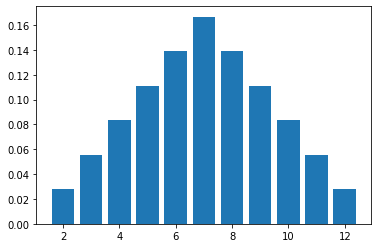

In [132]:
plt.bar(X5,P5)

* 누적 확률 분포를 그리세요.

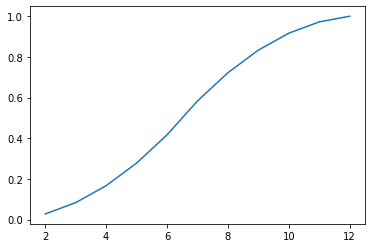

In [133]:
F5= np.cumsum(P5)
plt.plot(X5, F5)

#### **예제 06. 손의 길이**


* 확률변수가 '성인의 손 길이(cm)' 입니다. $X$를 10부터 20까지 1000개의 값으로 정의하세요.

In [7]:
X6 = np.linspace(10,20,1000)

* 손 길이에 대한 확률이 다음과 같이 주어졌을 때 함수 $f$ 를 정의하세요. ($\sigma$ = 1)



\begin{align}
 f(x)=\frac{1}{\sqrt{2\pi}\sigma}\exp^{-\frac{(x-15.2)^2}{2*\sigma^2}}
\end{align}

In [8]:
def f6(X,sigma):
    return np.exp(-((X-15.2)**2)/(2*sigma**2))/np.sqrt(2*np.pi)*sigma

* 확률 분포를 그리세요.

<BarContainer object of 1000 artists>

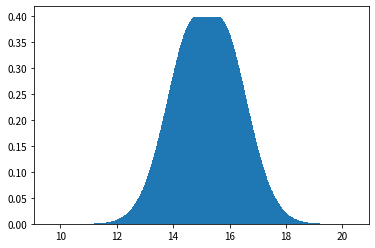

In [9]:
P6 = f6(X6,1)

plt.bar(X6,P6)

* 누적 확률 분포를 그리세요.

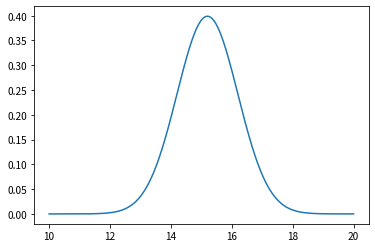

In [10]:
F6 = np.cumsum(P6)
plt.plot(X6, P6)

#### **예제 07. 파라미터 변경**

예제 06 에서 정의한 함수 $f$의 파라미터 $\sigma$를 각각 `0.5, 1, 2, 4`로 정의한 후 확률분포와 누적확률 분포를 그리세요.

\begin{align}
 f(x)=\frac{1}{\sqrt{2\pi}\sigma}\exp^{-\frac{(x-15.2)^2}{2*\sigma^2}}
\end{align}

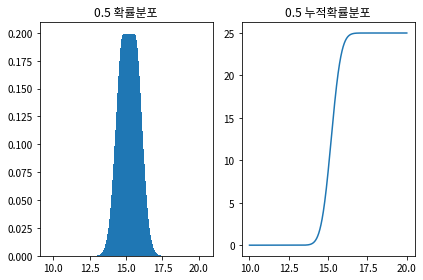

In [22]:
X7 = np.linspace(10,20,1000)
def f7(X, sigma):
    P7 = f6(X,sigma)
    F7 = np.cumsum(P7)
    
    plt.subplot(1, 2, 1)
    plt.bar(X7,P7)
    plt.title(f'{sigma} 확률분포')

    plt.subplot(1, 2, 2)
    plt.plot(X7, F7)
    plt.title(f'{sigma} 누적확률분포')
    
    plt.tight_layout()
    plt.show()
    
f7(X7,0.5)

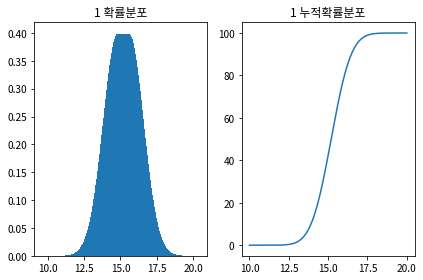

In [23]:
f7(X7,1)

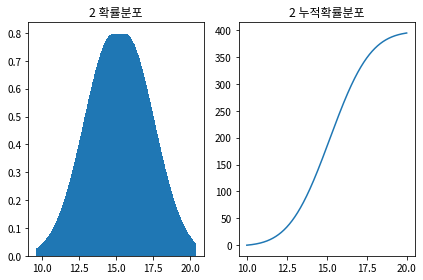

In [24]:
f7(X7,2)

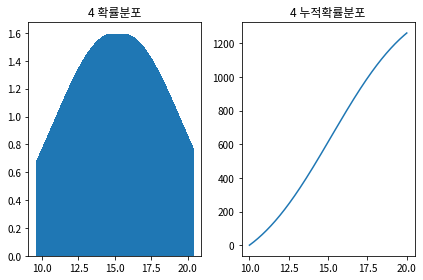

In [25]:
f7(X7,4)